In [5]:
######Plot ncells vs ngenes
rm(list=ls())

In [6]:
# setwd("/Users/wei/Dropbox (Partners HealthCare)/Projects/SAIGE-QTL/Figures")
library(gdata)
library(ggplot2)
library(scales)
library(chron)
library(dplyr)
library(data.table)
library(tidyr)
library(ggrepel)

In [7]:
# assign original colours to cell types
df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

In [8]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/weis_figures/"

In [9]:
ncelldata = fread(paste0(mydir,"ncells_celltype.txt"), header=F, data.table=F)
colnames(ncelldata) = c("celltype", "nsample", "ncell")
ngenesdata = fread(paste0(mydir,"n_egenes.txt"), header=T, data.table=F)
data = merge(ncelldata, ngenesdata, by.x="celltype", by.y="celltype", all.y=T)
#data$ncell = log10(data$ncell) 
#data = data[which(data$method == "SAIGEQTL"),]
#data = data[order(data$ncell),] 
head(data)

,celltype,nsample,ncell,ngenes,method
,<chr>,<int>,<int>,<int>,<chr>
1,B_IN,982,82068,716,TensorQTL
2,B_IN,982,82068,1206,SAIGEQTL
3,B_Mem,982,48023,596,TensorQTL
4,B_Mem,982,48023,955,SAIGEQTL
5,CD4_ET,982,61786,842,TensorQTL
6,CD4_ET,982,61786,1166,SAIGEQTL


In [10]:
data$celltype <- factor(data$celltype, 
                        levels = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK",
                                   "NK_R","Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

In [11]:
p1 = ggplot(data, aes(x=ncell, y=ngenes, color = celltype, shape = method)) + 
  geom_point(size = 6) + 
  
  scale_x_continuous(trans = log10_trans(),
                     breaks = trans_breaks("log10", function(x) 10^x),
                     labels = trans_format("log10", math_format(10^.x))) +
  
  scale_color_manual(name = "cell type",
                     values = df_colours$colours) + 
  
  
  
  xlab("Number of cells") + ylab("Number of genes at FDR<5%") +
  scale_shape_manual(name = "Method", 
                     labels = c("SAIGEQTL","TensorQTL"), 
                     values = c(16,10)) + 
  theme(
    #plot.background = element_blank(),
    #plot.title = element_text(size=16,hjust = 0.5),
    legend.title=element_blank(), 
    legend.text =element_text(size=14), axis.title=element_text(size=16), axis.text=element_text(size=14),
    axis.line = element_line(colour = "black"),
    strip.text.x = element_text(size = 10),
    strip.text.y = element_text(size = 10),
    panel.background = element_blank()
    #axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
  )
# ggsave(paste0("ngenes_ncells.jpeg"), p1, width = 10, height = 5)  

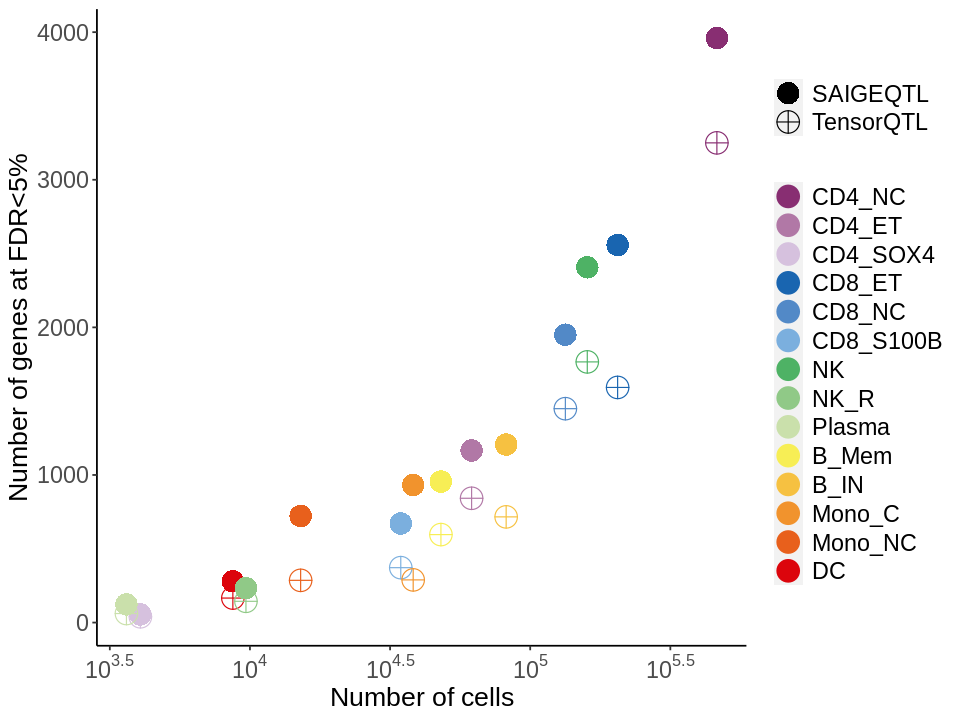

In [13]:
options(repr.plot.width = 8, repr.plot.height = 6)
p1

In [14]:
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/weis_figures/"
pdf(paste0(fig_dir,"n_eGenes_n_cells.pdf"), width=8, height=6)
p1
dev.off()

png 
  2